=== Handle imports and paths ===

In [2]:
import sys
sys.path.append('/mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/') 
sys.path.append('/mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/functions/') 
from paths_and_imports import *
from control_flow_functions import *
%load_ext autoreload
%autoreload 2

=== Load the trained model ===

In [3]:
trained_model = get_gnn(fs=feature_scale, dropout_levels=dropout_levels, 
                           pooling_path=pooling_path, ico_levels=ico_levels)    
trained_model.load_state_dict(torch.load(f'{output_dir}trained_weights.pth'))

<All keys matched successfully>

=== Validate the model on the CN and AD testing sets ===

Cognitively Normal (CN) Subjects

MAE (L1) Loss: 7.333 across 1128 observations
Variance and MAE Loss: 95.428 across 1128 observations


Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_CN_raw_age_gaps.png
Figure stats: mean = -3.580445982216494 ; median = -3.1998941945708523 ; std = 6.2230987858970535 ; var = 38.72695849903338
Factors: [-0.84728014 60.56842519]
Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_CN_corrected_age_gaps.png
Figure stats: mean = 1.3161986860662444e-06 ; median = 0.1056489632838975 ; std = 2.4361790982467073 ; var = 5.93496859873414

Top 10 significant age gaps:

                  region hemi       age_gap variance  skew  region_avg     adj_pval
          S_pericallosal   lh -3.93 (-7.51)    56.62 -0.07       -2.89 4.509732e-38
   G_oc-temp_med-Parahip   rh -3.43 (-7.01)    61.80 -0.21       -2.97 1.877496e-27
   S_temporal_transverse   rh -3.00 (-6.58)    60.97 -0.20       -0.90 4.656478e-21
       S_orbital_late

<Figure size 640x480 with 0 Axes>

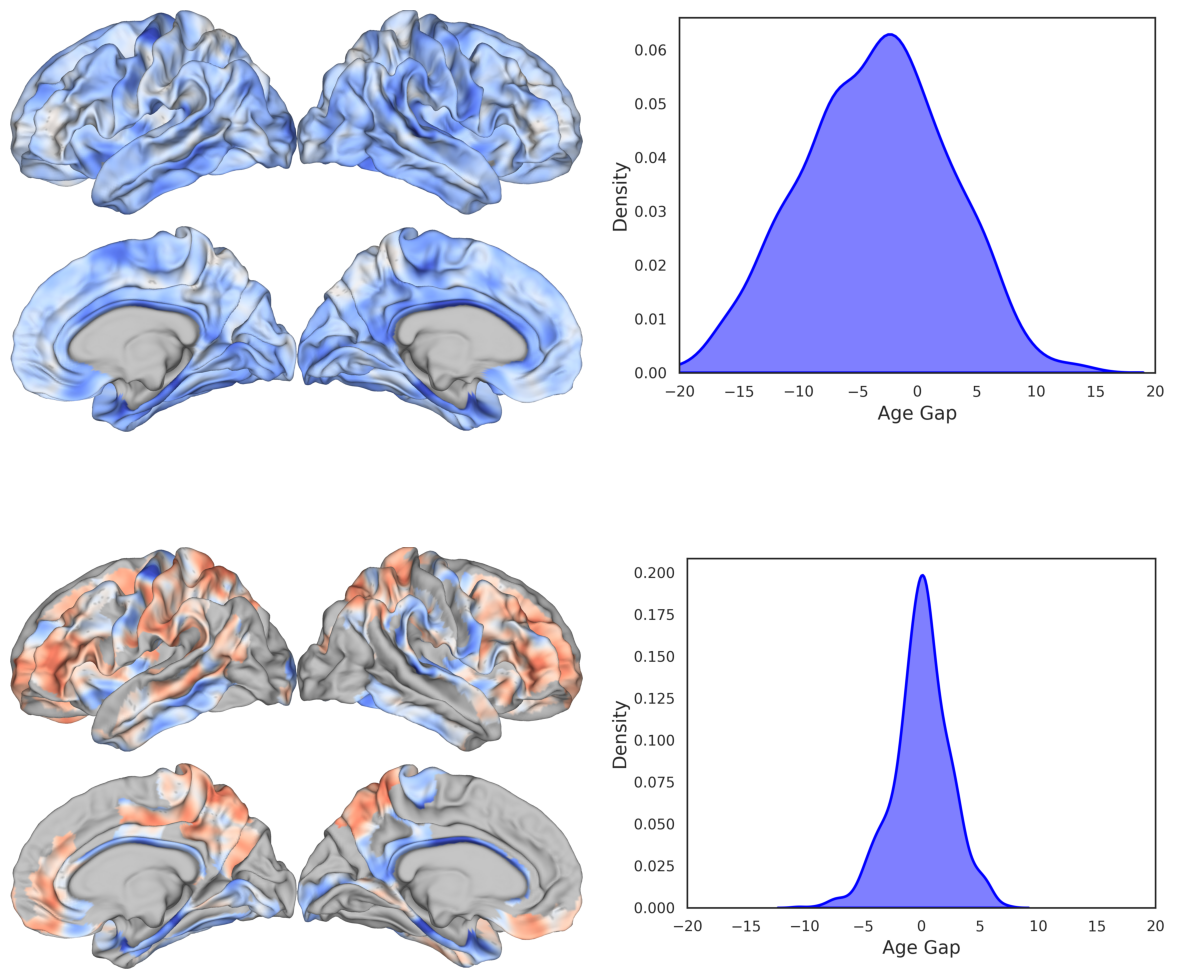

In [46]:
suffix='test_CN'
test_model(X_test_CN, y_test_CN, model=trained_model, suffix=suffix)
postprocess_model(suffix, factors=None, global_limits=20)

Alzheimer's Disease (AD) Subjects

MAE (L1) Loss: 8.151 across 477 observations
Variance and MAE Loss: 112.105 across 477 observations


Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_AD_raw_age_gaps.png
Figure stats: mean = -2.4340949965956296 ; median = -2.72013582068638 ; std = 7.9425149765690986 ; var = 63.08354415302443
Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_AD_corrected_age_gaps.png
Figure stats: mean = 1.4945060184433143 ; median = 1.5959643642034962 ; std = 2.459871972594662 ; var = 6.050970121556752

Top 10 significant age gaps:

                   region hemi      age_gap variance  skew  region_avg     adj_pval
     Lat_Fis-ant-Vertical   lh 3.67 (-0.26)    58.68 -0.37        2.95 1.304756e-10
        S_orbital_lateral   lh 3.40 (-0.53)    58.95 -0.29        3.36 2.985076e-09
        S_orbital_lateral   rh 3.32 (-0.61)    57.83 -0.38        3.36 3.910884e-09
S_intrapariet_and_P_trans   rh 3.26 (-0.67)    60.03 -0.43    

<Figure size 640x480 with 0 Axes>

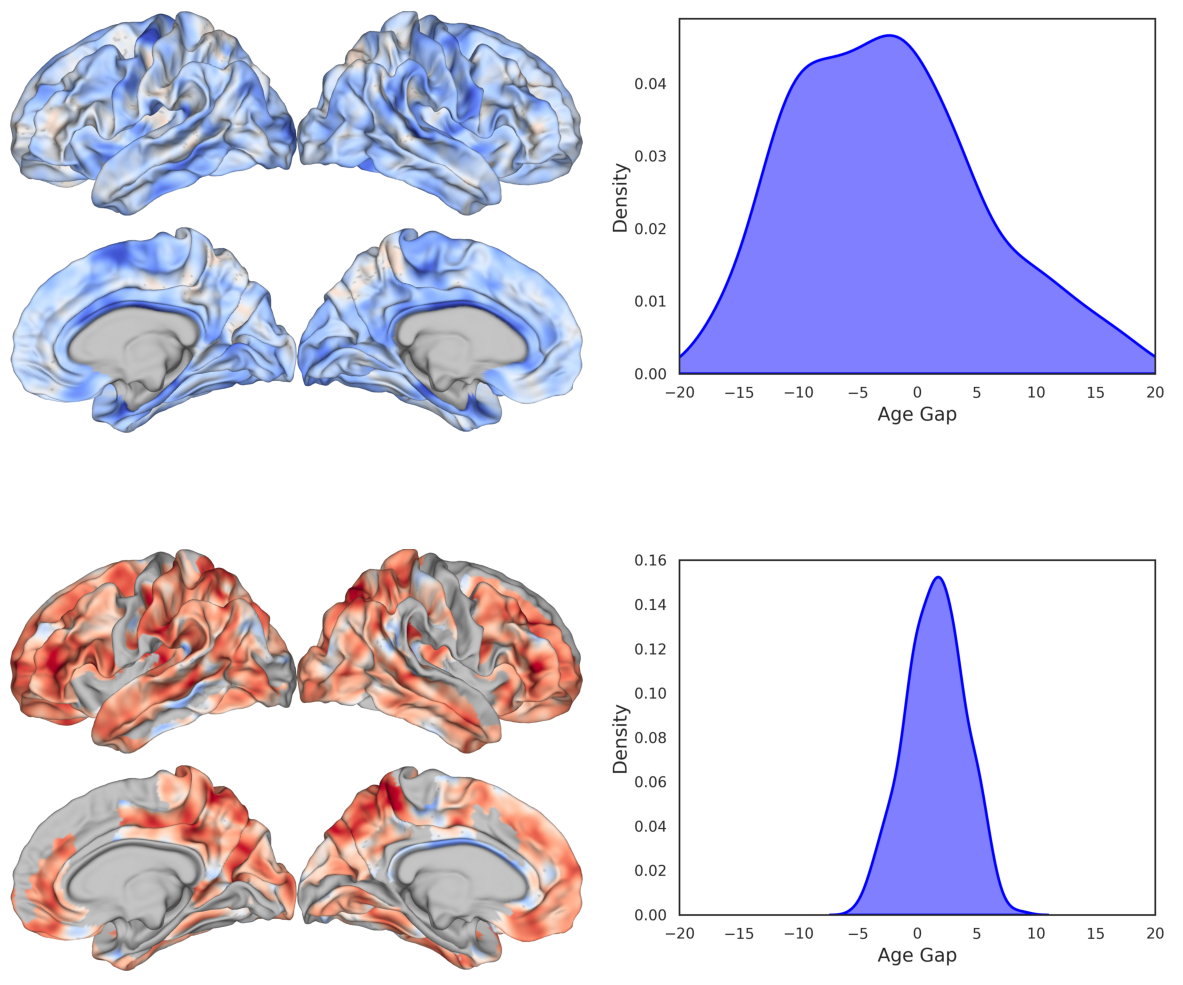

In [47]:
suffix='test_AD'
test_model(X_test_AD, y_test_AD, model=trained_model, suffix=suffix)
postprocess_model(suffix, factors=np.load(f'{output_dir}test_CN_factors.npy'))

View L-BAG difference for CNs and ADs


Top 10 significant age gaps:

               region hemi  age_gap    t_stat      raw_pval  region_avg      adj_pval  significant
G_oc-temp_med-Parahip   rh 2.786453 37.005694 4.102367e-191    2.717328 8.673576e-190            1
        S_oc-temp_lat   rh 2.732789 21.905881  3.147554e-75    2.273270  7.394254e-75            1
G_temp_sup-G_T_transv   rh 2.717183 27.484754  1.222222e-84    2.154307  3.546841e-84            1
G_oc-temp_lat-fusifor   rh 2.685054 44.914244 5.625426e-236    2.295297 2.081408e-234            1
G_oc-temp_med-Parahip   lh 2.648203 22.458743  6.885730e-93    2.717328  2.613046e-92            1
S_temporal_transverse   rh 2.522767 21.423027  4.155043e-52    2.168291  7.150539e-52            1
G_temp_sup-Plan_polar   rh 2.418449 18.878100  1.564897e-58    2.340061  2.969292e-58            1
  S_collat_transv_ant   rh 2.407226 31.254632 4.021190e-121    2.094925 3.132295e-120            1
       G_temporal_inf   rh 2.368503 45.126277 3.267770e-253    2.210653 1.6121

(array([0.54761744, 1.80256455, 0.67180932, ..., 0.92994063, 0.5952919 ,
        0.41378883]),
 array([-0.54773913,  0.69894931, -0.26918513, ..., -1.62380264,
        -1.80957406, -1.82682768]))

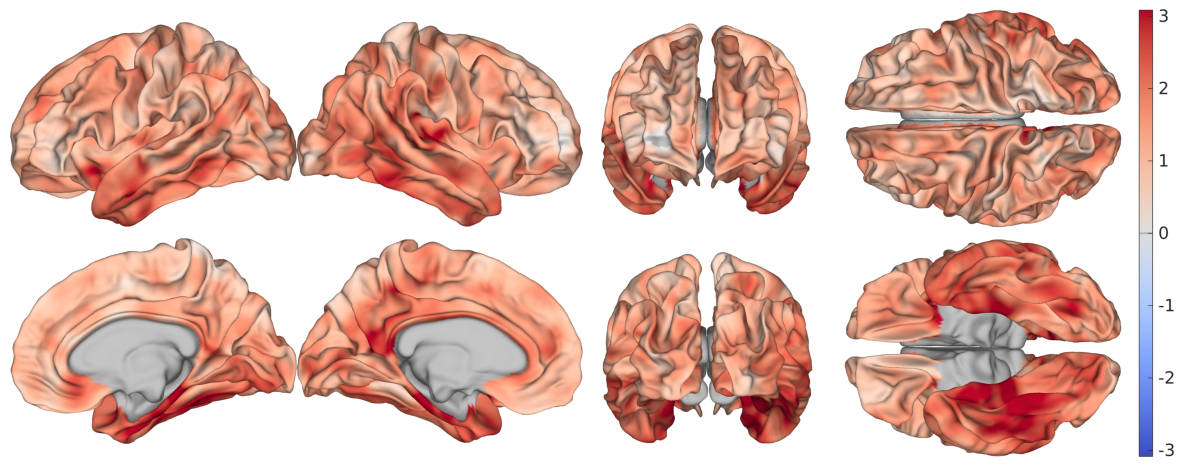

In [48]:
compare_cohorts(suffix='AD-CN', cohort_pred='test_AD', cohort_ref='test_CN') # pred - ref

Display the age gaps of the CN and AD sets

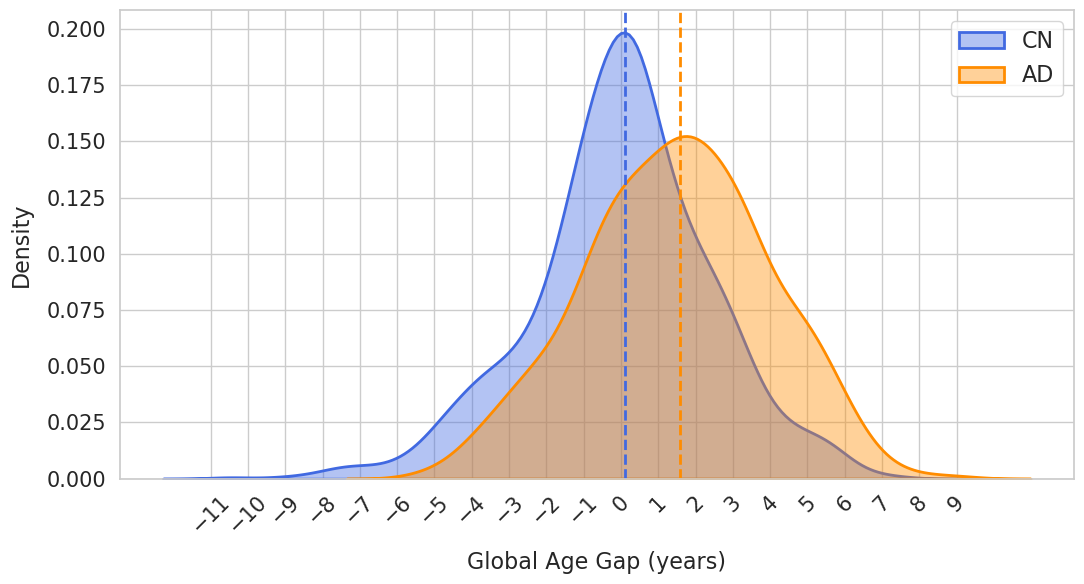

In [49]:
compare_age_gaps(np.load(f'{output_dir}test_CN_corrected_age_gaps.npy'), 
                 'CN',
                 np.load(f'{output_dir}test_AD_corrected_age_gaps.npy'), 
                 "AD",
                 x_step = 1)
plt.savefig(f'{output_dir}CN_AD_AGs.png')

Get the region stats, including average age gap, for CNs, ADs, and AD-CNs

In [ ]:
print('\n\nCN\n')
show_ranked_differences(suffix='test_CN', output_dir=output_dir)
print('\n\nAD\n')
show_ranked_differences(suffix='test_AD', output_dir=output_dir)
print('\n\nAD-CN\n')
show_ranked_differences(suffix='AD-CN', output_dir=output_dir)



CN


All regions ranked by average age gap:
Region                               Avg Gap   LH Gap   RH Gap
-------------------------------------------------------------------------------------
S_orbital_lateral                       2.64     2.89     2.39 
G_and_S_transv_frontopol                2.12     2.33     1.91 
G_parietal_sup                          2.03     2.24     1.81 
G_front_inf-Triangul                    1.86     2.00     1.72 
S_front_sup                             1.81     1.80     1.82 
Lat_Fis-ant-Vertical                    1.77     2.43     1.10 
S_intrapariet_and_P_trans               1.75     1.57     1.93 
S_front_middle                          1.74     1.20     2.28 
Lat_Fis-ant-Horizont                    1.73     1.71     1.76 
G_and_S_frontomargin                    1.71     1.66     1.76 
S_postcentral                           1.59     1.77     1.42 
S_front_inf                             1.56     1.67     1.45 
G_precuneus                          

=== Determine relationship between brain age gap and cognitive scores ===

Regress global brain age gap, temporal pole age gaps, and cognitive scores

In [8]:
# Get the regression results
local_results, cog_arrays, _ = regress_cognitive(data_dir, output_dir, cog_path, test_relations, 
                                              subset=True, postprocess_obj=postprocess(), 
                                              get_beta_arrays=True, mask_by='adj', pval_thresh=0.05,
                                              partial_region_names=False,
                                              regions=[('all', 'both'), ('Pole_temporal', 'both'),
                                                       ('G_oc-temp_med-Parahip', 'both'), ('S_orbital_lateral', 'both')])

# Save the df and cog arrays
local_results.to_csv(f'{output_dir}local_cog_tests.csv')
with open(f'{output_dir}all_cog_arrays.pkl', 'wb') as f: 
    pickle.dump(cog_arrays, f)

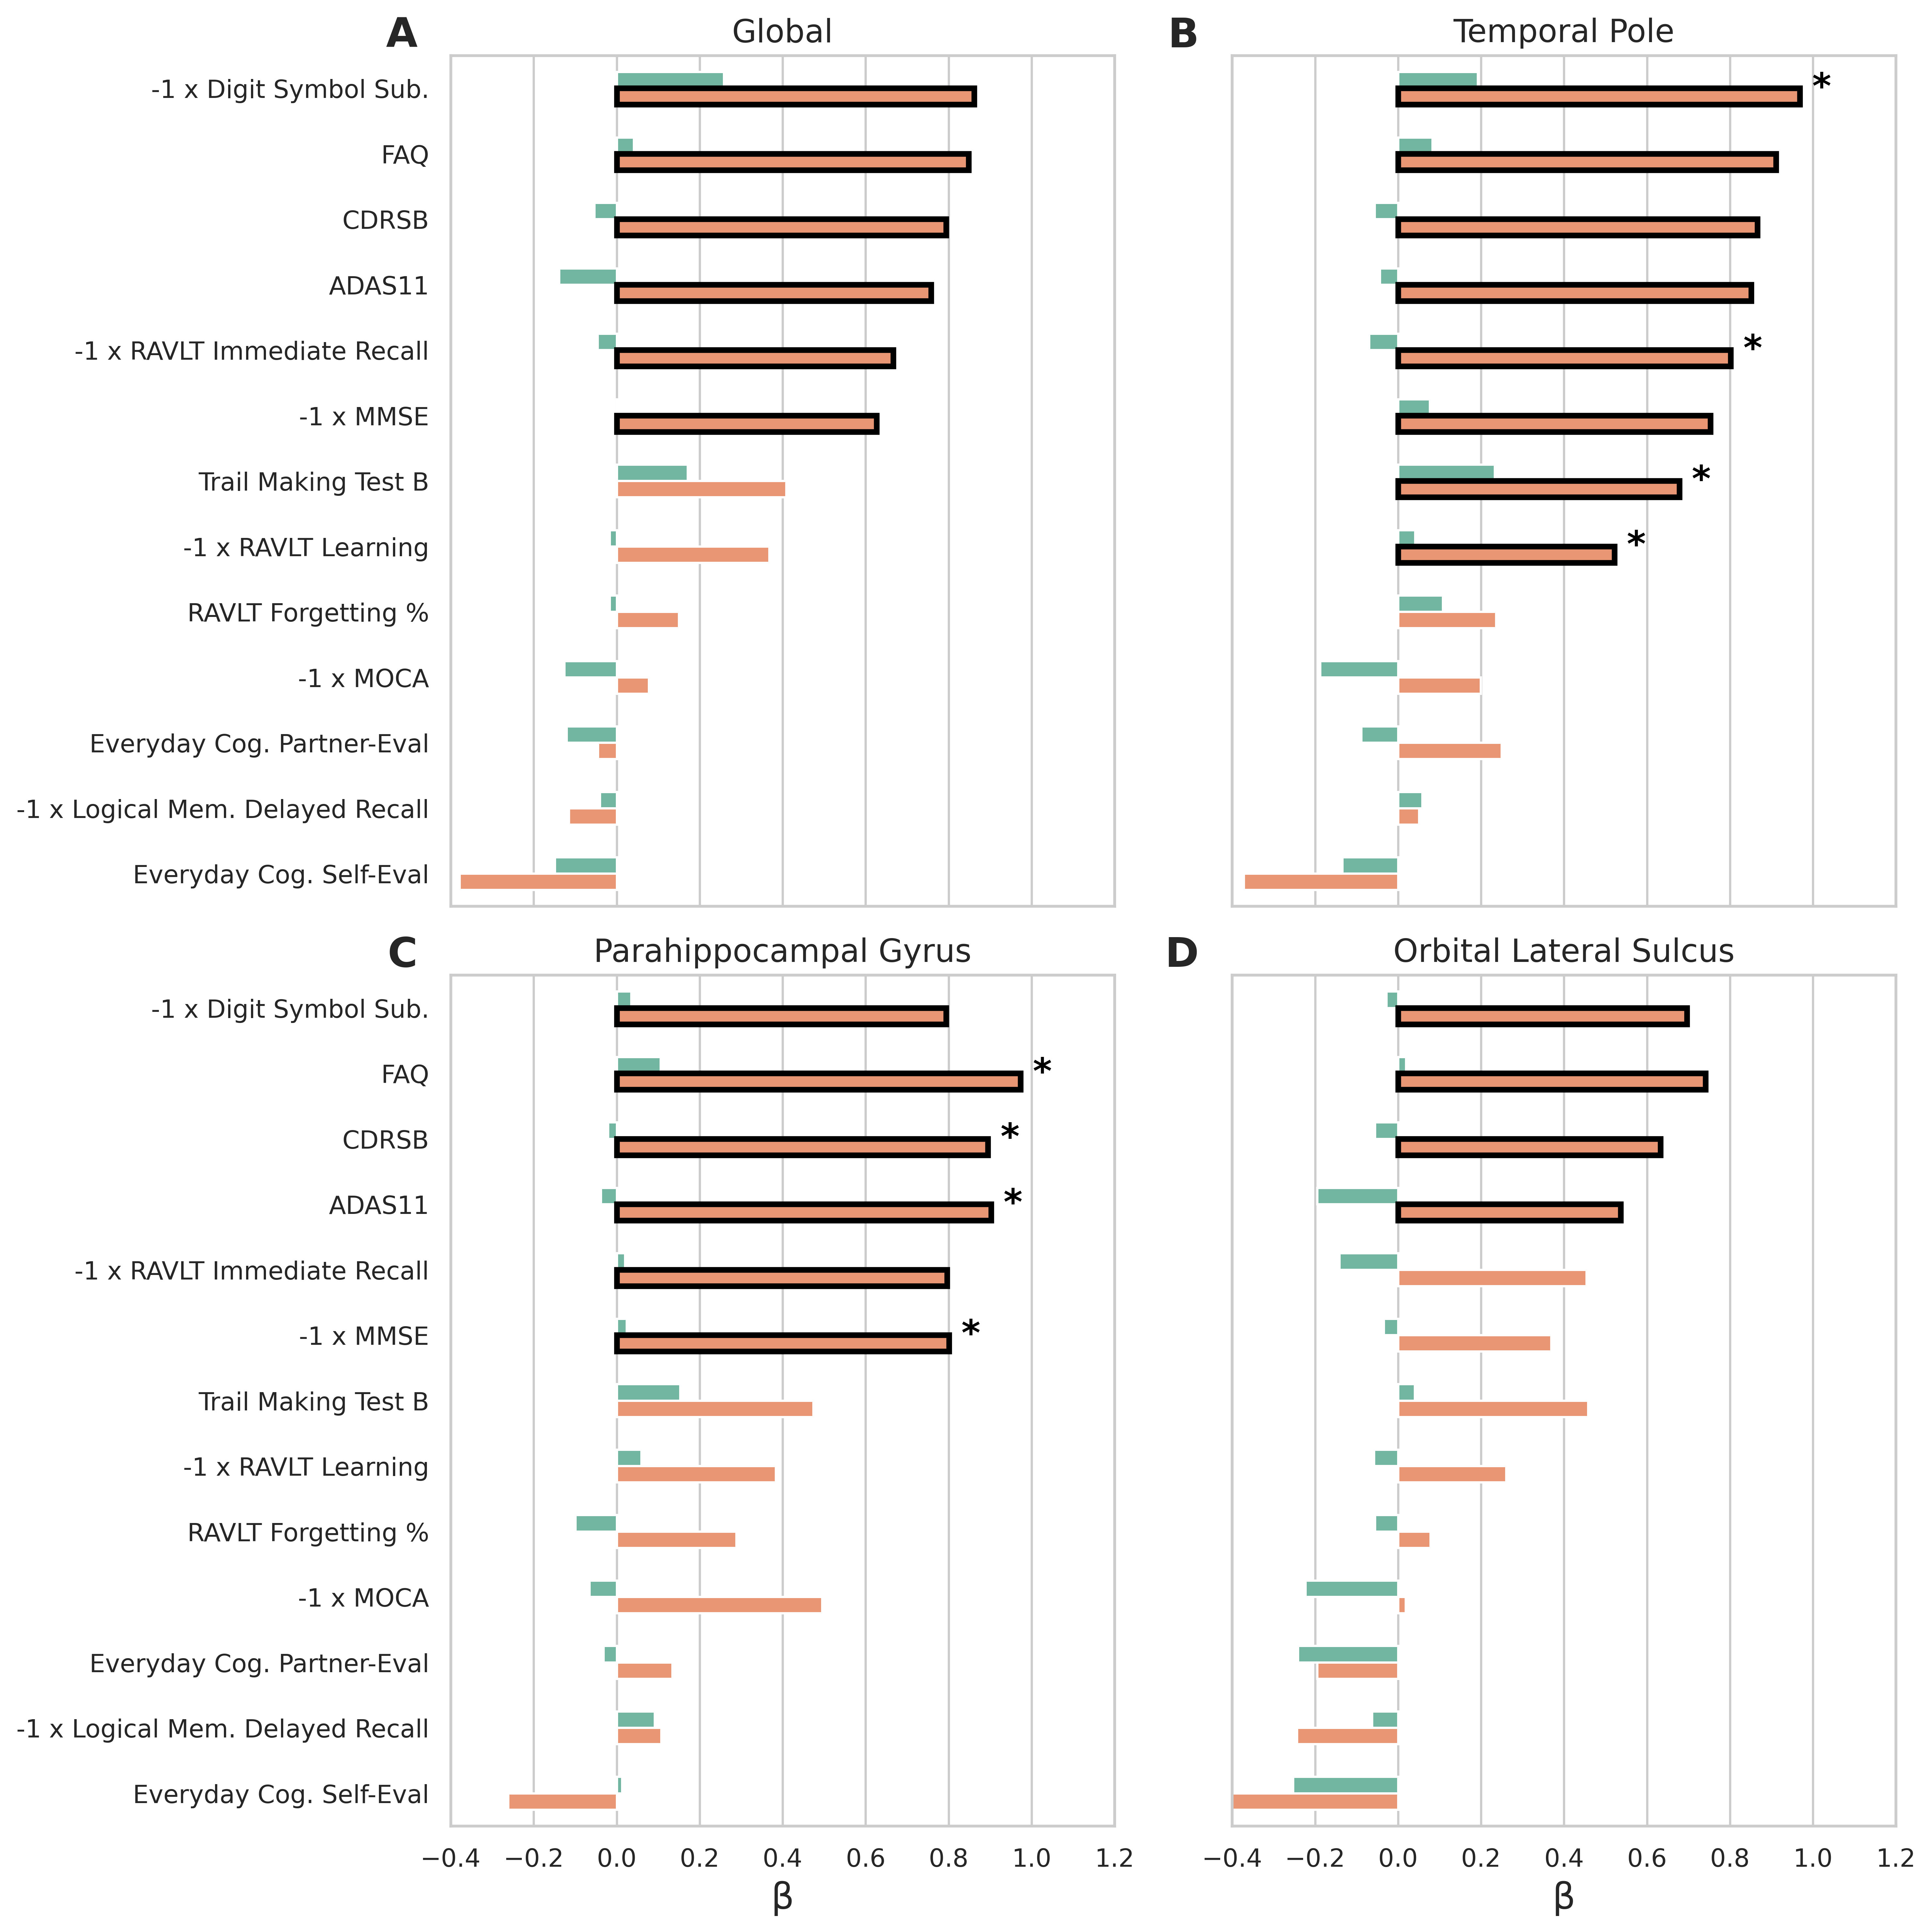

In [9]:
# Load and clean results
local_results = pd.read_csv(f'{output_dir}local_cog_tests.csv')

# Replace certain tests to make them more readable
local_results['test'] = local_results['test'].replace({
    'DIGITSCOR': 'Digit Symbol Sub.',
    'RAVLT_immediate': 'RAVLT Immediate Recall',
    'TRABSCOR': 'Trail Making Test B',
    'RAVLT_learning': 'RAVLT Learning',
    'RAVLT_perc_forgetting': 'RAVLT Forgetting %',
    'EcogSPTotal': 'Everyday Cog. Partner-Eval',
    'LDELTOTAL': 'Logical Mem. Delayed Recall',
    'EcogPtTotal': 'Everyday Cog. Self-Eval'
})

# Replace regions them more readable
local_results['region'] = local_results['region'].replace({
    'Pole_temporal': 'Temporal Pole',
    'G_oc-temp_med-Parahip': 'Parahippocampal Gyrus',
    'G_temporal_inf' : 'Inferior Temporal Gyrus',
    'S_orbital_lateral' : 'Orbital Lateral Sulcus',
    'Front' : 'Frontal',
    'all' : 'Global'
})

# Replace hemis them more readable
local_results['hemi'] = local_results['hemi'].replace({
    'lh': 'Left',
    'rh': 'Right',
})

# Add negative signs to indicate inversion
local_results.loc[local_results['is_inverted'], 'test'] = '-1 x ' + local_results.loc[local_results['is_inverted'], 'test'].astype(str)

# Identify the largest, significant regions for each test
ad_sig = local_results[(local_results['cohort'] == 'AD') & (local_results['adj_pval'] < 0.05)]
top_regions_df = (ad_sig.loc[ad_sig.groupby(['test', 'hemi'])['coef'].idxmax()].reset_index(drop=True))

# Set style
sns.set(style='whitegrid')

# Get unique region × hemi combinations
region_hemi_combos = local_results[['region', 'hemi']].drop_duplicates()
n_subplots = len(region_hemi_combos)
n_cols = 2
n_rows = (n_subplots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12), dpi=500, sharex=True)
axes = axes.flatten()

# Get test order based on coef size in Global region
global_order = (
    local_results[(local_results['region'] == 'Global') & (local_results['cohort'] == 'AD')]
    .groupby('test')['coef'].mean()    # if multiple entries per test, average
    .sort_values(ascending=False)
    .index
)

for i, ((region, hemi), ax) in enumerate(zip(region_hemi_combos.values, axes)):
    combo_data = local_results[(local_results['region'] == region) & (local_results['hemi'] == hemi)]

    sns.barplot(
        data=combo_data,
        y='test', x='coef', hue='cohort',
        palette='Set2', ax=ax, width=0.5, order=global_order
    )

    # Bold significant bars
    bold_significant_bars(combo_data, ax, 
                          'test', 'cohort',
                          pval_thresh = 0.05, 
                          hue_order=['CN', 'AD'])

    # Add stars for largest sig regions
    for _, row in top_regions_df.iterrows():
        if row['region'] == region and row['hemi'] == hemi:
            test = row['test']
            coef_val = row['coef']

            # map test label → y position
            ytick_labels = [t.get_text() for t in ax.get_yticklabels()]
            ytick_pos = ax.get_yticks()
            label_to_y = dict(zip(ytick_labels, ytick_pos))
            ypos = label_to_y.get(test)
            if ypos is None:
                continue

            # place star just to the right of the AD bar
            ax.text(coef_val + 0.03, ypos, '*',
                    va='center', ha='left',
                    fontsize=16, fontweight='bold', color='black')

    # Fixed x-axis range
    ax.set_xlim(-0.4, 1.2)

    # Title = region + hemisphere
    if hemi == 'both':
        ax.set_title(region, fontsize=14)
    else:
        ax.set_title(f"{region} ({hemi})", fontsize=14)

    # Only show y-ticks on left column
    if i % n_cols != 0:
        ax.set_yticks([])

    # Only show x-tick labels on bottom row
    if i < n_subplots - n_cols:
        ax.tick_params(axis='x', labelbottom=False)

    ax.set_xlabel('β', size=16)
    ax.set_ylabel('')
    ax.get_legend().remove()

# Remove any empty axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
    
# Add subplot indicators
subplot_labels = ['A', 'B', 'C', 'D']
for ax, label in zip(axes[:len(subplot_labels)], subplot_labels):
    ax.text(
        -0.05, 1, label, 
        transform=ax.transAxes, 
        fontsize=18, fontweight='bold', 
        va='bottom', ha='right')
        
plt.tight_layout()
plt.savefig(f'{output_dir}local_cog_barplot.png')